# **Machine Learning Project**
---

 **Zak Mohamed**

 **September 2024**
# **Anomaly Detection of Network Traffic**
---
This project implements anomaly detection on network traffic data using
three models:
- Decision Trees
- Neural Networks
-- Binary Classification
-- Multi Class Classification
- Isolation Forest

These algorithms will be implemented using the Scikit-Learn and TensorFlow libraries.

# **1. Introduction**
---


Network intrusion detection is essential for protecting computer networks from malicious activities and potential threats. As cyberattacks become more advanced, the need for effective detection systems is more important than ever. Intrusion Detection Systems (IDS) monitor network traffic for suspicious activities, allowing for quick responses to potential dangers.

The NSL-KDD dataset is one of the most commonly used resources for assessing the performance of these systems. This dataset offers a comprehensive collection of network traffic data, featuring both normal and attack instances.

In this project, we create and evaluate various machine learning models that can differentiate between normal and attack traffic.

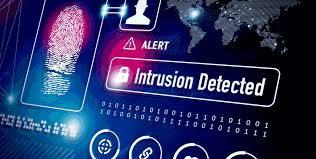

## **Table of Contents**

>[Machine Learning Project](#scrollTo=U3AS3JspLb4w)

>[Anomaly Detection of Network Traffic](#scrollTo=U3AS3JspLb4w)

>[1. Introduction](#scrollTo=NT7RfKCPNitu)

>[Dataset](#scrollTo=_PFF2Ap3LeB1)

>[2. Data Loading](#scrollTo=WDG7VSUvL6Eb)

>[3. Data Preprocessing](#scrollTo=MuwIpy1wMO_N)

>>>[Feature Scaling](#scrollTo=hJat1xmfRcd2)

>[4. Exploratory Data Analysis](#scrollTo=Nfmr4lUvSSn6)

>>>>[Inference from EDA](#scrollTo=ObbFNRhhURo1)

>[5. Principal Component Analysis](#scrollTo=D-1c7NNwUoyO)

>[6. Machine Learning](#scrollTo=7Xkp3FuDWItC)

>>>[6.1 Decision Trees](#scrollTo=e5YYrIQkWpcA)

>>>[6.2 Neural Networks](#scrollTo=racQHMeLRhqt)

>>>>[Interpretation of Neural Network Results](#scrollTo=GMTFXduTZfDu)

>>>[Evaluation On New Unseen Data](#scrollTo=MKf-KH-kFv6x)

>>[6.3 Multi Class Classification](#scrollTo=0XUr9wf3TK54)

>>>[Multi Class Classification Inference](#scrollTo=eIyoDYj5yllr)

>>[6.4 Isolation Forest](#scrollTo=rCvq2wSxb1j_)

>[7. Evaluation and comparison of models](#scrollTo=HZjPRkUfei-w)

>>>[Accuracy and F1 Scores Comparison](#scrollTo=HZjPRkUfei-w)

>>>>[Confusion Matrices Comparison](#scrollTo=7ixlfxZahJPv)

>>>[8. Final Inferences](#scrollTo=qFuSxAFlhv2S)

>>>>[Insights](#scrollTo=sTkByx3okOlQ)

>[9. Conclusion](#scrollTo=VmA_LnwJk033)



# **Dataset**
--------
We will use the NSL-KDD dataset, which is a refined version of the KDD Cup 1999 dataset.
It contains various features extracted from network traffic data, labeled as normal or specific types of attacks.

Here is where it can be found on Kaggle.

https://www.kaggle.com/datasets/hassan06/nslkdd?resource=download

### **Importing Necessary Libraries**

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# **2. Data Loading**

I loaded the following datasets onto the interface but you could also call it using an API from kaggle.

You could also import os library and load it from your computer or google drive as well.

In [150]:
# Define column names
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])


# Load datasets
train = pd.read_csv('/content/KDDTrain+.txt', names=columns)
test = pd.read_csv('/content/KDDTest+.txt', names=columns)

# Combine train and test for preprocessing
data = pd.concat([train, test], axis=0).reset_index(drop=True)



# **3. Data Preprocessing**

Let us first see which features in our dataset are categorical in nature

In [151]:
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: ['protocol_type', 'service', 'flag', 'outcome']


We see that 4 of the 43 features are non numeric. Let us handle them by **label encoding.**

But before we do that let us see how many unique entries they each have

In [152]:
print(f"{data['protocol_type'].unique()}")
print(f"{data['service'].unique()}")
print(f"{data['flag'].unique()}")
print(f"{data['outcome'].unique()}")

['tcp' 'udp' 'icmp']
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack'
 'processtable' 'h

In [153]:
# Identify categorical features
categorical_features = ['protocol_type', 'service', 'flag']

# Initialize LabelEncoders and transform categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le
    print(f"Encoded {feature} with classes: {list(le.classes_)}")


Encoded protocol_type with classes: ['icmp', 'tcp', 'udp']
Encoded service with classes: ['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
Encoded flag with classes: ['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']


We now also encode the target variable.

The target variable 'outcome' indicates whether a connection is normal or an attack. We convert it into binary form.

*Note:*
--

*We will do both binary classification and multi classification. Because of that, I will be saving the target column in two seperate variables: The first one will be encoded into 1 for attack and 0 for normal. The other will be encoded into more than 2 numbers (as many as unique attacks we have).*

*Multi class classification will be done after binary classification*

**Now we continue with our exploration intended for binary classification**

In [154]:
# Binary encoding of the target variable
data['outcome'] = data['outcome'].apply(lambda x: 0 if x == 'normal' else 1)
# Encode 'outcome' for multi-class classification

# Display the distribution of classes
print(data['outcome'].value_counts())



outcome
0    77054
1    71463
Name: count, dtype: int64


This is an incredibly well balanced class.

*Note: - That is good for us as we won't have to worry about class imbalance if our model overfits later*

We can now see the data is all numeric

In [155]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21


### **Feature Scaling**

For algorithms that are sensitive to the scale of the data, feature scaling is important.

We standardize our features to be represented equally on the same scale.

Before we do that, we seperate the features from the target in this case 'outcome'

In [156]:
# Separate features and target
X = data.drop('outcome', axis=1)
y = data['outcome']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

print(f"Feature scaled shape: {X_scaled.shape}")


Feature scaled shape: (148517, 42)


Let us see if we're missing any values now.

In [157]:
#Check for missing values
data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


No features have missing values. We can now move onto the next phase

# **4. Exploratory Data Analysis**


  **Distribution of numerical features**

- Histograms
- KDE plots

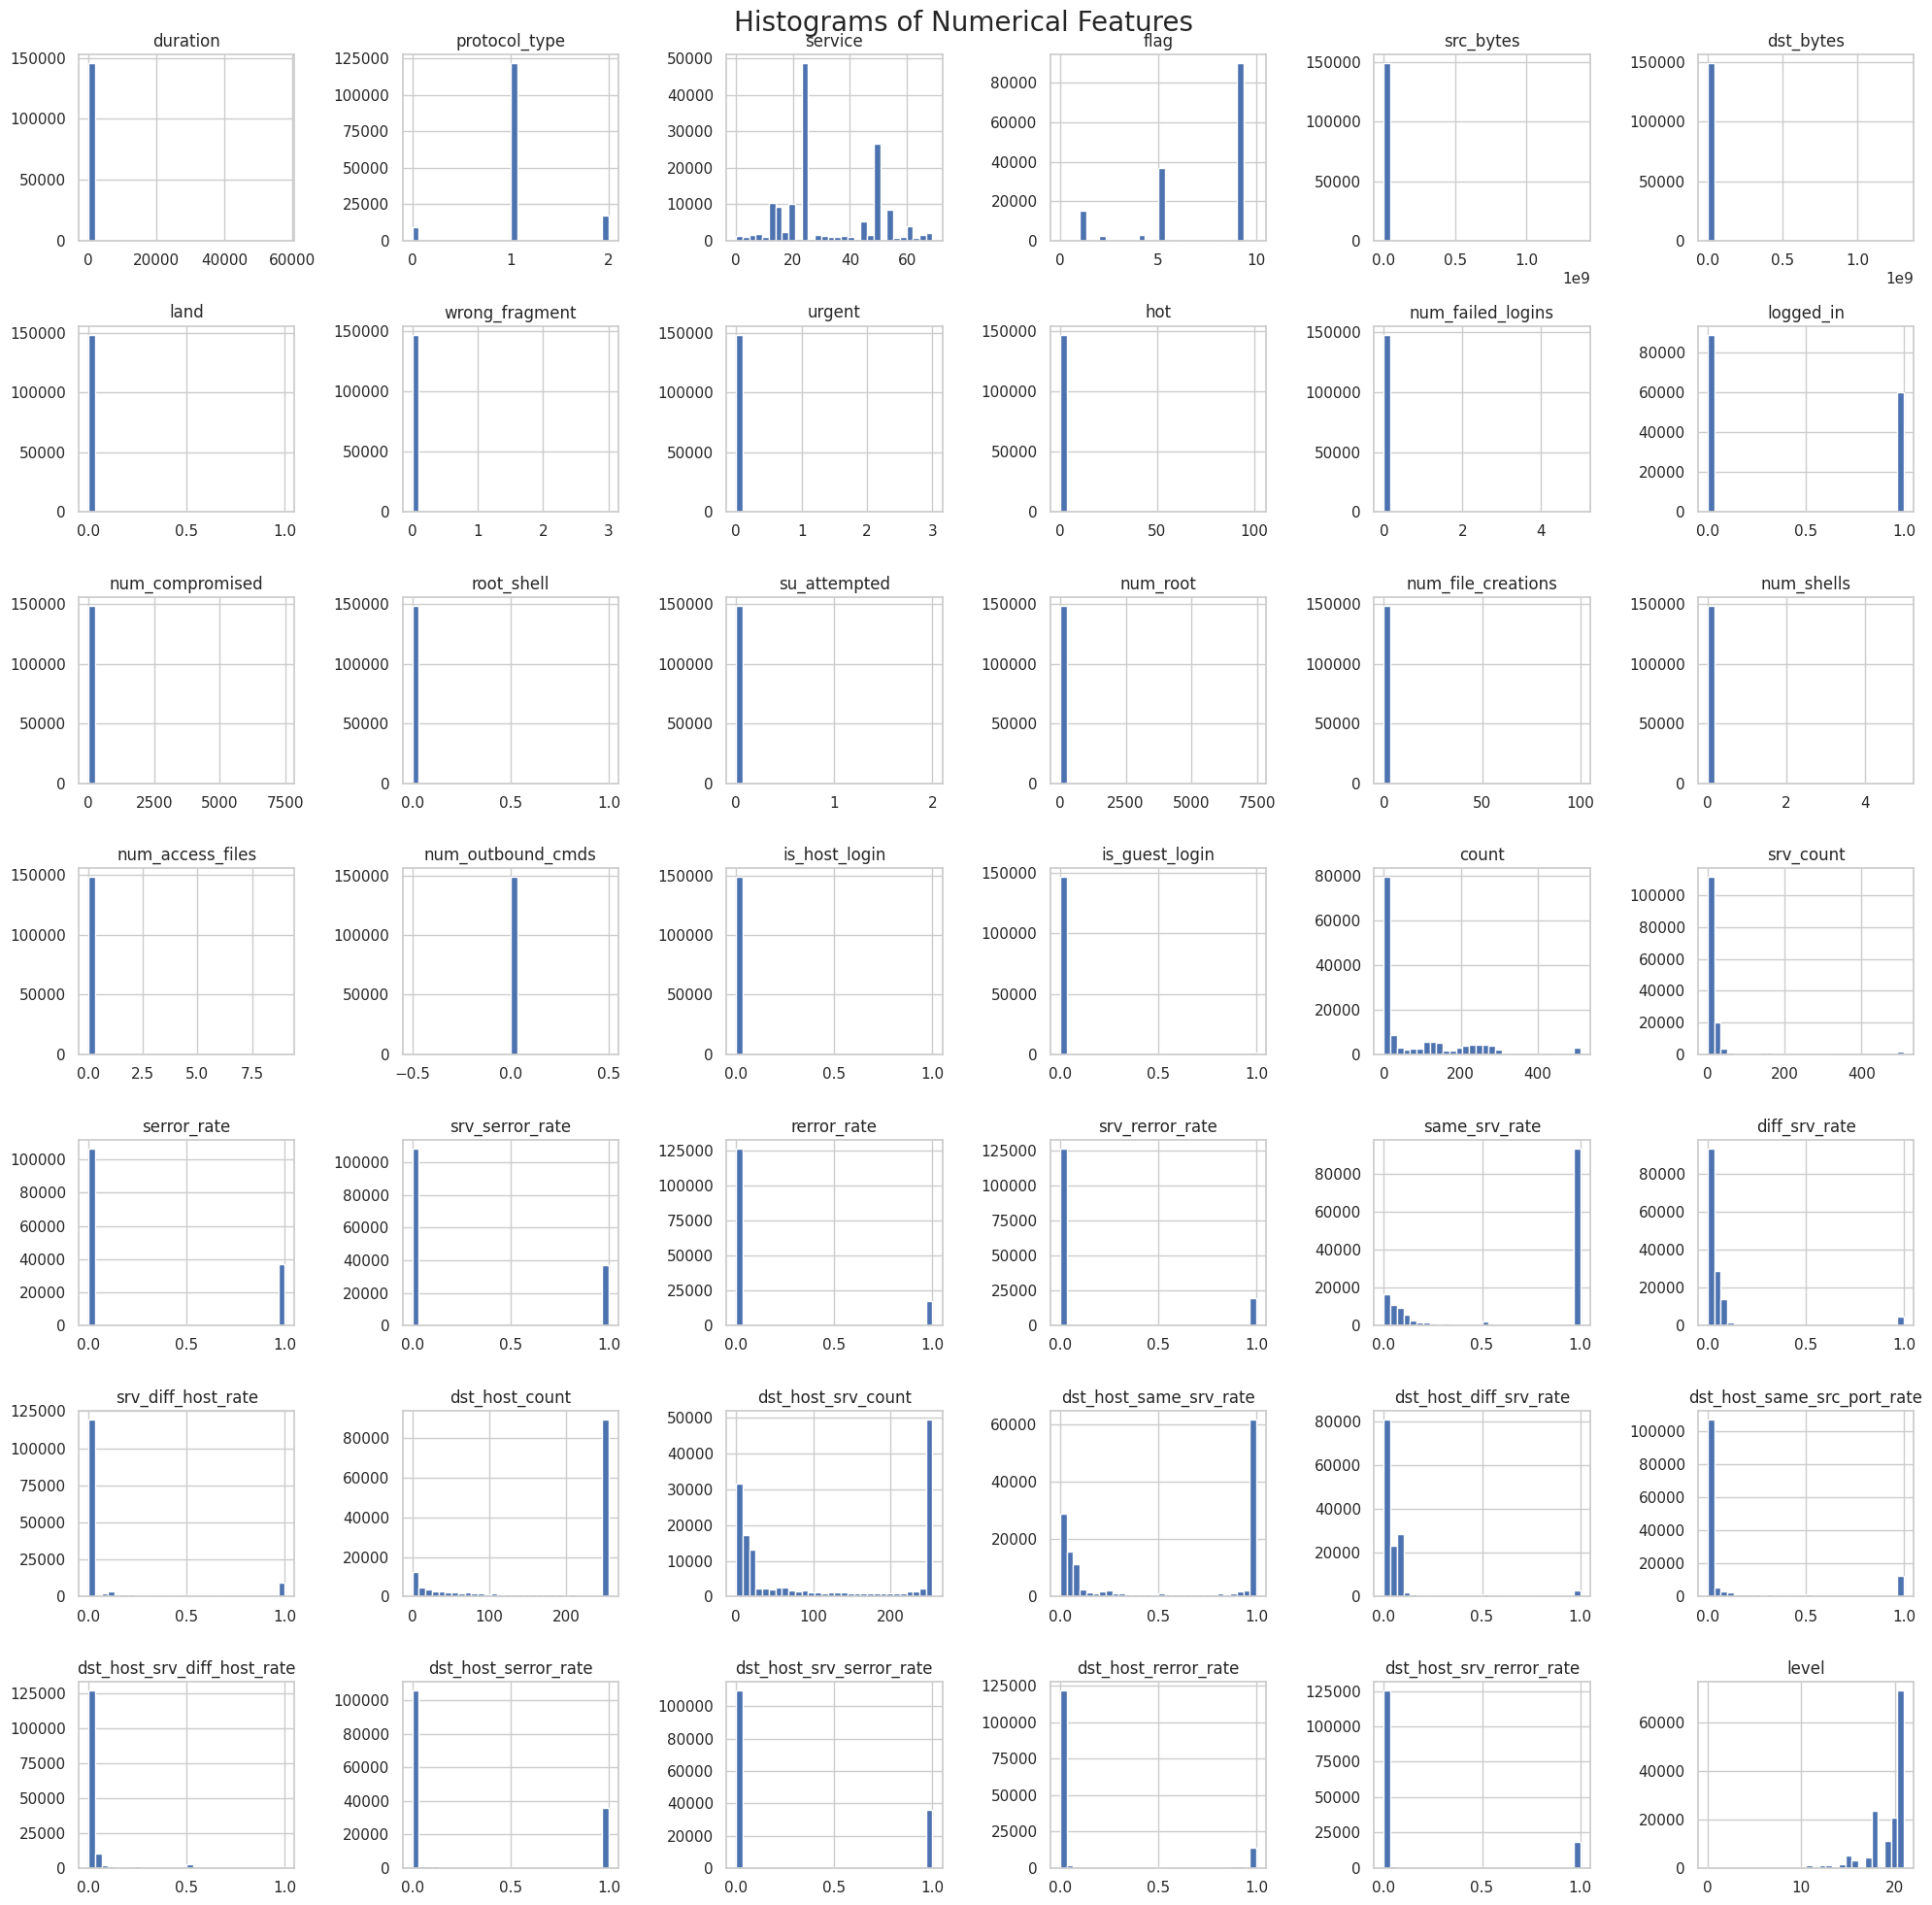

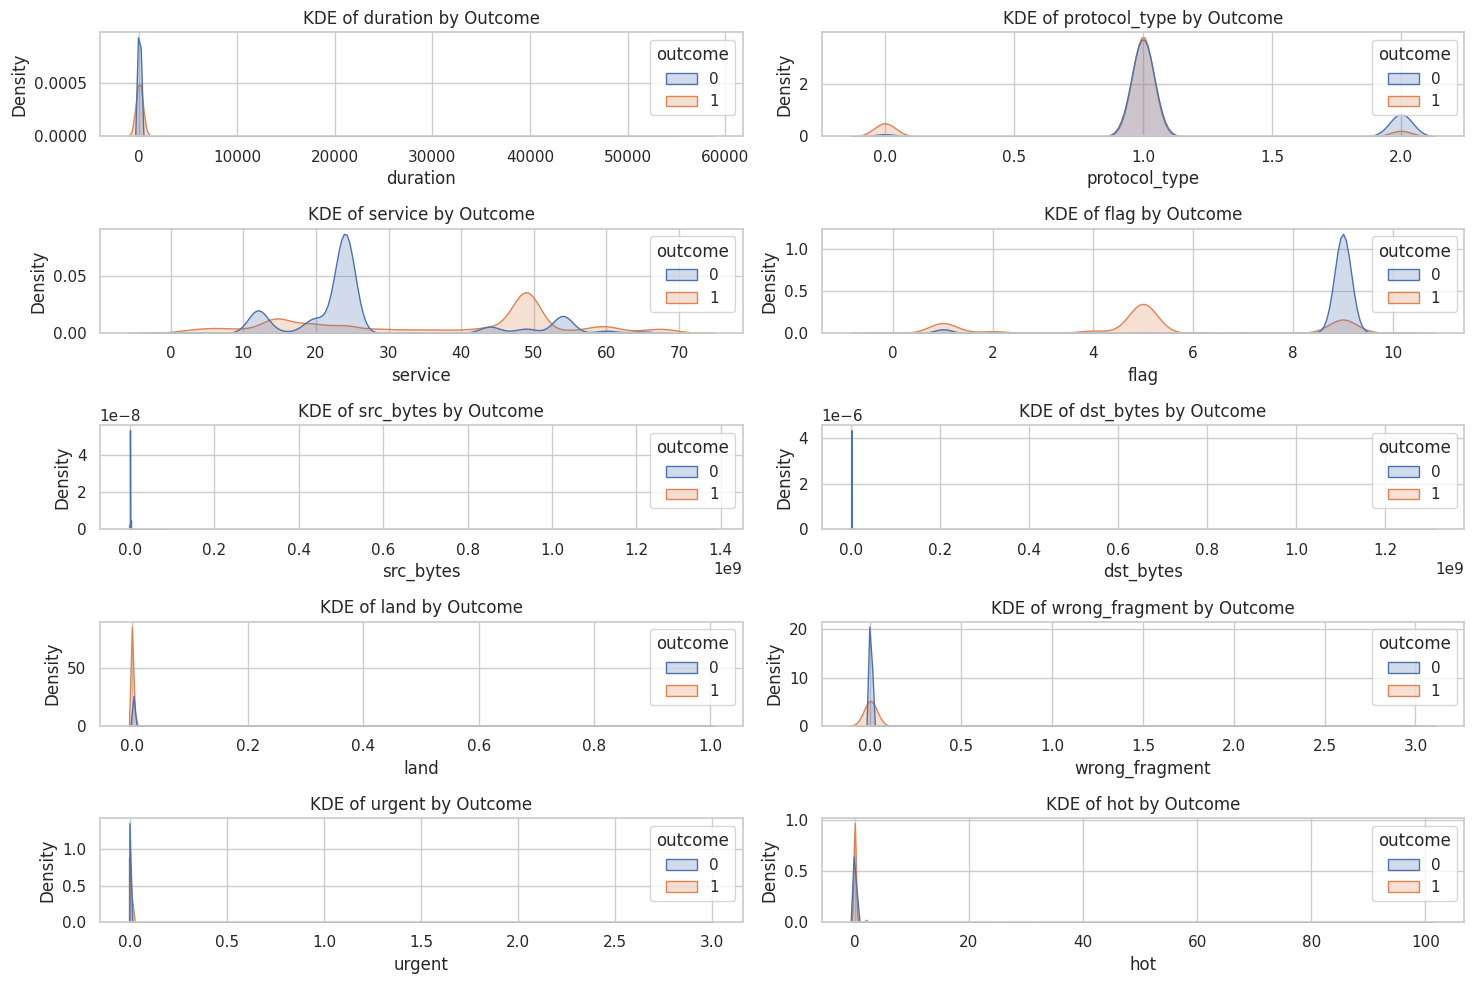

In [158]:
# Select numerical columns

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
numerical_cols = X_scaled_df.columns

# Histograms
X.hist(figsize=(20, 20), bins=30)
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.tight_layout()
plt.show()

# KDE Plots for a subset of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:10], 1):  # Plotting first 10 for clarity
    plt.subplot(5, 2, i)
    sns.kdeplot(data=data, x=col, hue='outcome', fill=True)
    plt.title(f'KDE of {col} by Outcome')
plt.tight_layout()
plt.show()


**Boxplots for outlier detection**
- This plot is important to see the distribution of the data to catch outliers.
- They can also just be noie disguised as outliers so we have to be careful here.

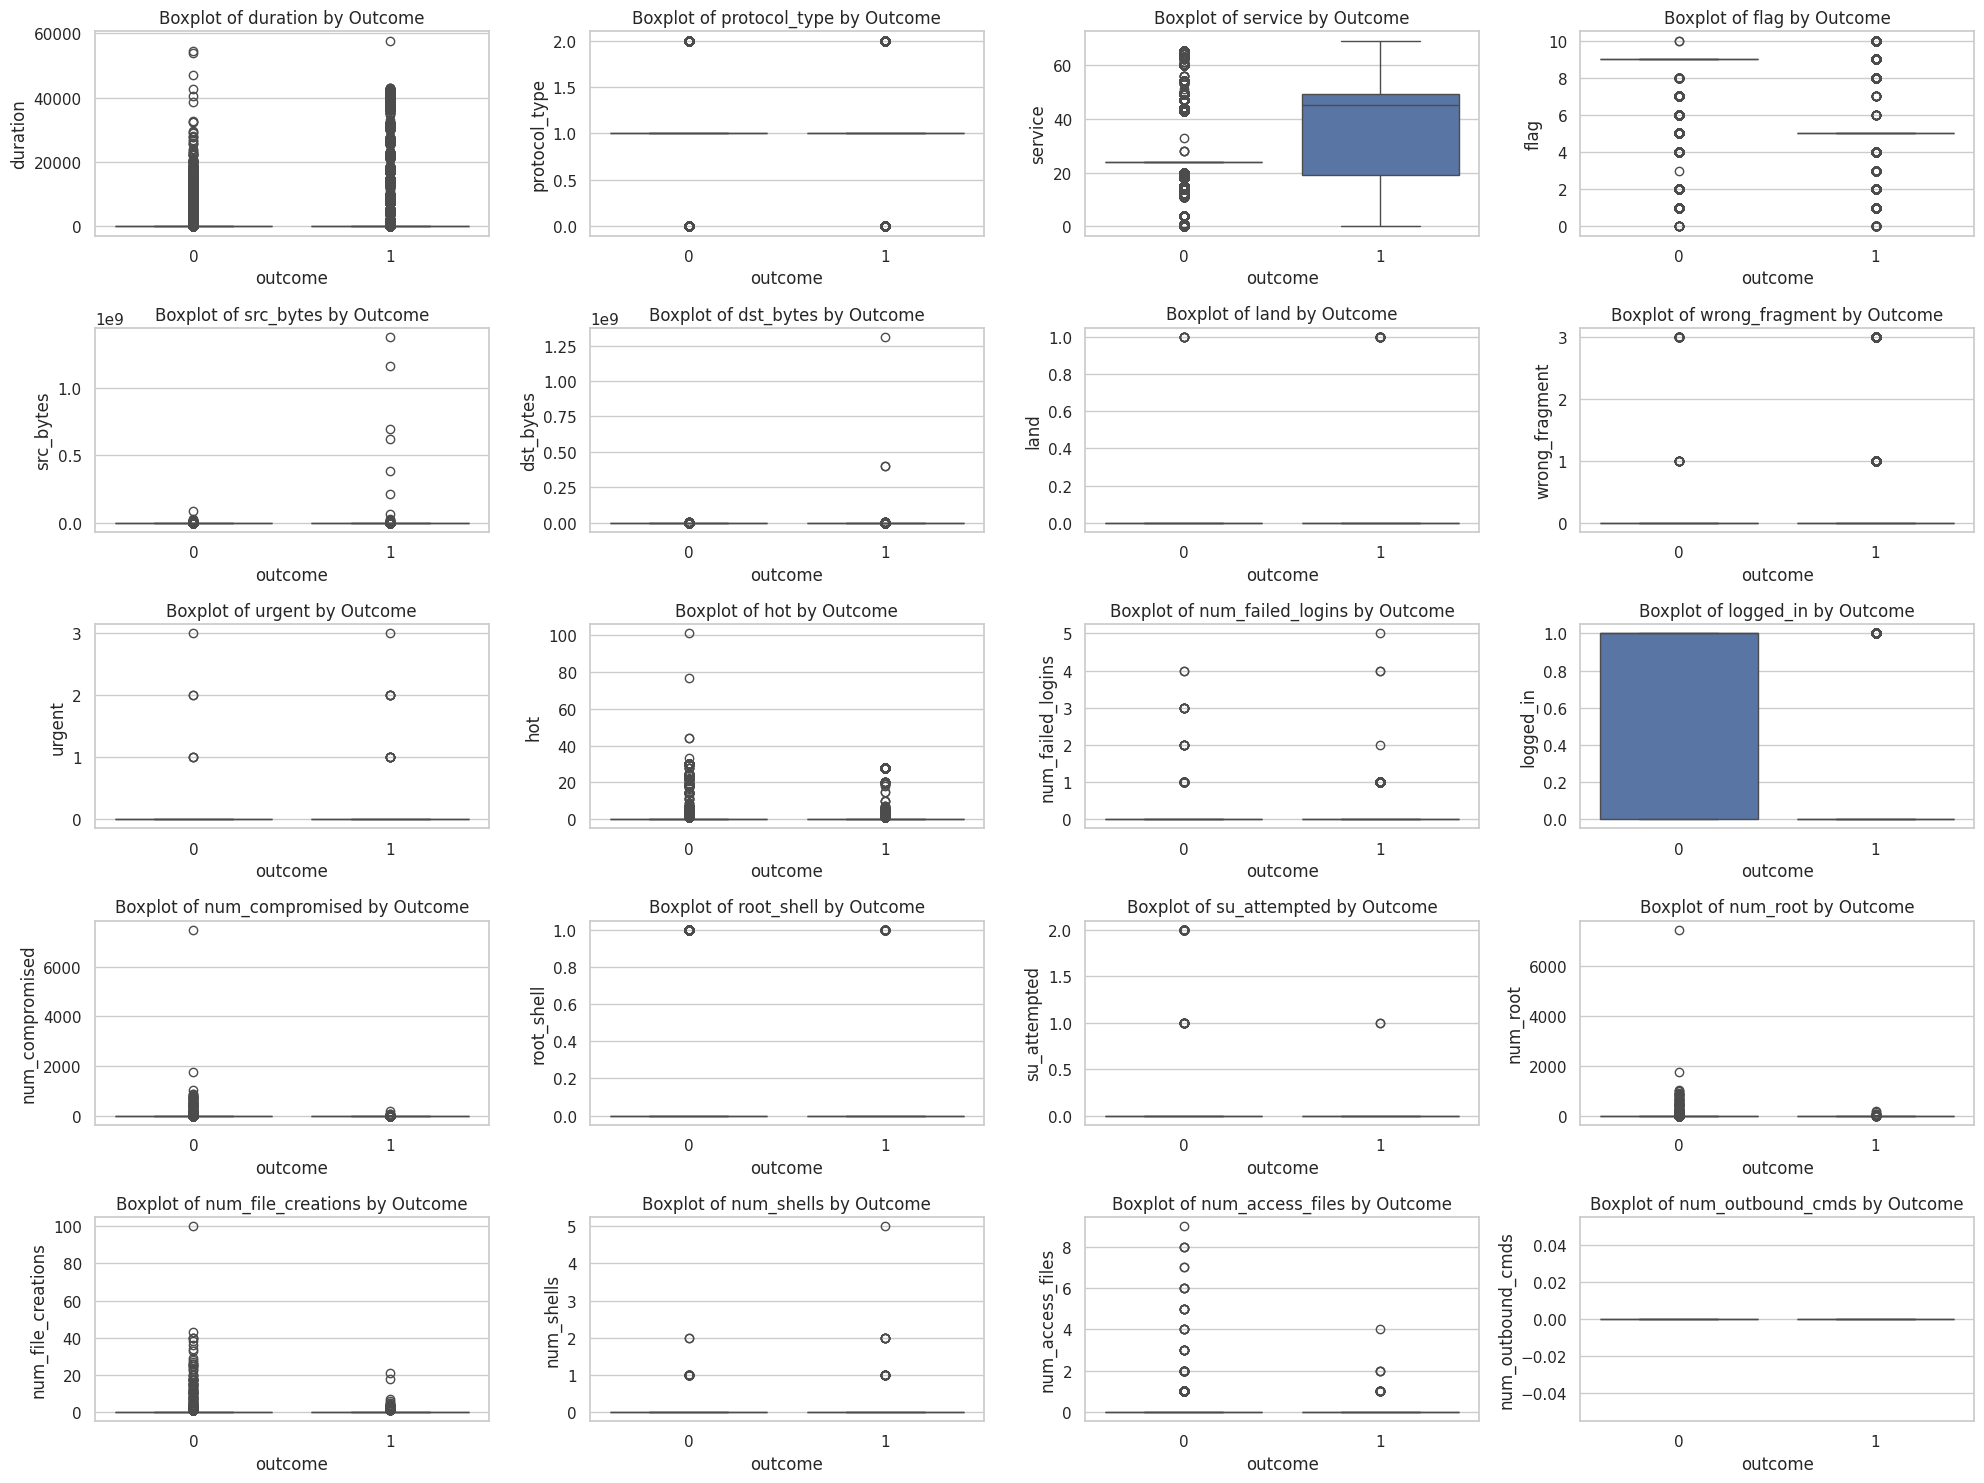

In [159]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:20], 1):  # Plotting first 20 for clarity
    plt.subplot(5, 4, i)
    sns.boxplot(x='outcome', y=col, data=data)
    plt.title(f'Boxplot of {col} by Outcome')
plt.tight_layout()
plt.show()



**count plot**

To see the distribution of our 'categorical' features

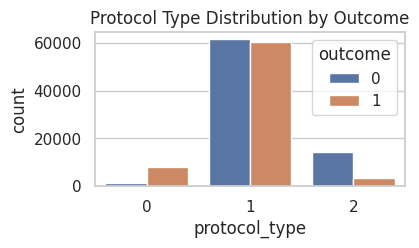

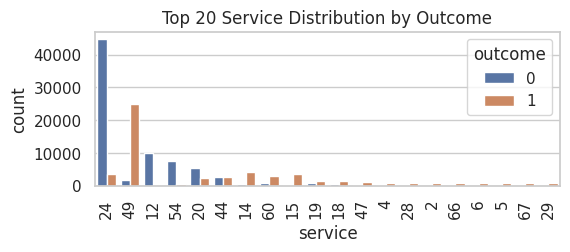

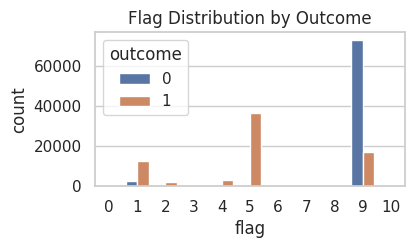

In [160]:
# Protocol Type Distribution
plt.figure(figsize=(4, 2))
sns.countplot(x='protocol_type', hue='outcome', data=data)
plt.title('Protocol Type Distribution by Outcome')
plt.show()

# Service Distribution (Top 20 for clarity)
top_services = data['service'].value_counts().nlargest(20).index
plt.figure(figsize=(6, 2))
sns.countplot(x='service', hue='outcome', data=data, order=top_services)
plt.title('Top 20 Service Distribution by Outcome')
plt.xticks(rotation=90)
plt.show()

# Flag Distribution
plt.figure(figsize=(4, 2))
sns.countplot(x='flag', hue='outcome', data=data)
plt.title('Flag Distribution by Outcome')
plt.show()


#### **Inference from EDA**

**Histogram**
- We can see that some of the features such as service has a lot of instances at around the value 20 and 50 and low frequency on the rest of the values.

- Because we see two peaks (for service), one could indicate normal and another could indicate an attack.

-However,  **majority of the features have peaks at only one value which indicates that it could be a 'normal' service as majority of the distribution is concentrated at that one value and very low on the rest of the values which indicates outliers**

- Below are some of the features that do not show to have many outliers
-- urgent
-- num_outbound_cmds
-- num_access_files
-- root shell
- We can draw a correlation heatmap for these to confirm if they would be unnecessary in our analysis and if so drop them.
- If we are confident however, we can just drop them.


**Count plot**
- We can see that all of the categorical features are important when it comes to outcome. The plot shows many attacks coming as a result to those features therefore no need to drop them.

**Histograms and KDEs**

- From the visualizations of these features we can also infer that all features are important to the analysis as they have multiple different outcomes for each feature.

As you can tell, this method is very cumbersome and sometimes the plots don't tell the full story

**The best way to select the most important features for our analysis however is through PCA.**

# **5. Principal Component Analysis**
**Dimensionality reduction**

Next we will do Principal Component Analysis (PCA), to select the most important features that captures maximum information about the dataset.

Principal component analysis, or PCA, is a statistical technique that  converts high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset.

The features are selected on the basis of variance that they cause in the output.

The feature that causes highest variance is the first principal component.

The feature that is responsible for second highest variance is considered the second principal component, and so on.

It is important to mention that principal components do not have any correlation with each other.

Let us visualize the minimum number of components needed to retain most of the variance

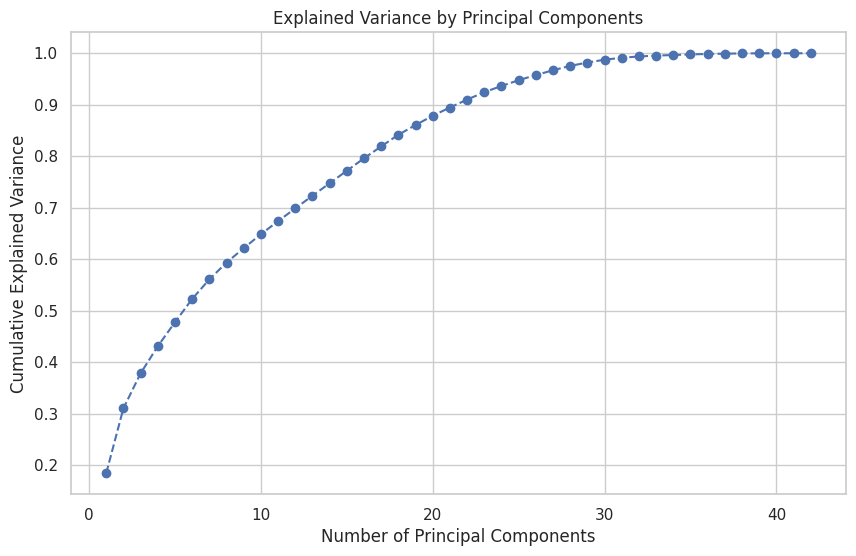

In [161]:
from sklearn.decomposition import PCA

# Perform PCA without reducing dimensions
pca = PCA()
pca.fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


We can see that about 20-25 should be good enough to train our models on because they explain most of the data.

 We will therefore do the dimensionality reduction through PCA and confirm the inference from the plot.

In [162]:

# Initialize PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)

# Fit and transform the scaled features
X_pca = pca.fit_transform(X_scaled)

print(f"Reduced number of features after PCA: {X_pca.shape[1]}")


Reduced number of features after PCA: 26


We have reduced the number of features from 43 to 26.
This is consistent with the PCA plot from earlier.

# **6. Machine Learning**


We will apply three different supervised learning algorithms to detect anomalies in the dataset.

- Decision Trees
- Neural Networks
- Isolation Forest

First, we split the data into training and testing


In [163]:

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 55)
print(f"X test samples: {X_test.shape}")
print(f"Y test samples {Y_test.shape}")
print(f"X train samples {X_train.shape}")
print(f"Y train samples {Y_train.shape}")

X test samples: (29704, 26)
Y test samples (29704,)
X train samples (118813, 26)
Y train samples (118813,)


### **6.1 Decision Trees**

There are several hyperparameters in the Decision Tree object from Scikit-learn. We will use only some of them and also we will not perform feature selection nor hyperparameter tuning in this project

The hyperparameters we will use and investigate here are:

**min_samples_split: The minimum number of samples required to split an internal node.**

Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.

**max_depth: The maximum depth of the tree.**

Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

We will plot a graph of the metrics between train and test just to see the number for these parameters we will choose before we train the model.

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
RANDOM_STATE = 55
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.


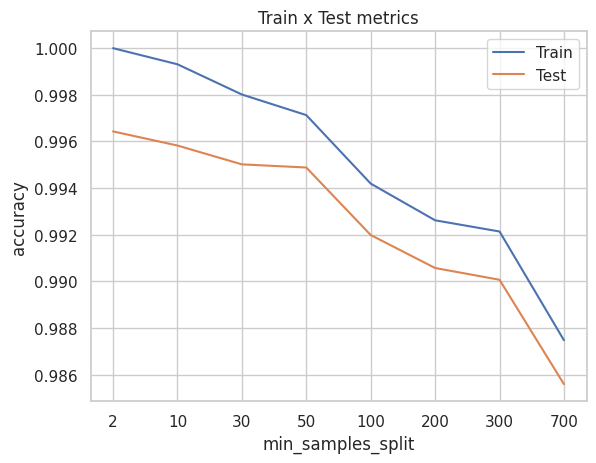

In [165]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,Y_train)
    accuracy_test = accuracy_score(predictions_test,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

We can see that around 50 samples, the test set and the training set are pretty close and their accuracies are at the highest parts when they are in the closest proximity. Any samples after that, the accuracy drops.

However, **to reduce the risk of overfitting, the more samples we choose the better**. You can see that after 300 samples, the accuracies have a steep drop with an indication that it could go all the way to zero.

**Therefore, the best number of minimum samples to use is 300.**

Now we do the same with Max depth

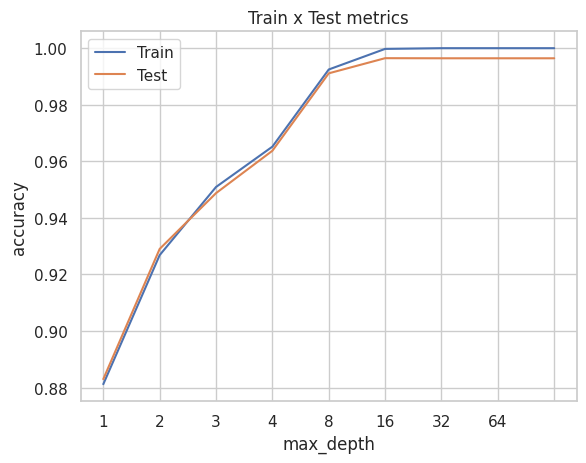

In [166]:

accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,Y_train)
    accuracy_test = accuracy_score(predictions_test,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])


According to the plot, It looks like the entire list of depths give us good accuracies on both the test set and the training set.

However, **to reduce the risk of overfitting, the less depth we choose the better**  so the perfect depth is 2.

Therefore, we will use the following parameters to train our data.

**max depth = 2**

**min samples = 300**

In [167]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 4,
                                             random_state = RANDOM_STATE).fit(X_train,Y_train)

In [168]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
decision_tree = decision_tree_model.predict(X_test)
decision_tree_score = accuracy_score(decision_tree, Y_test)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),Y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {decision_tree_score: .4f}")
tree_f1_score = metrics.f1_score(Y_test, decision_tree)
print(f"\nDecision Tree F1 Score:  {tree_f1_score :.4f}")

Metrics train:
	Accuracy score: 0.9652
Metrics validation:
	Accuracy score:  0.9637

Decision Tree F1 Score:  0.9624


Let us plot a confusion matrix to visualize the results

In [169]:

def plot_confusion_matrix(y_true, y_pred):
    """This function plots the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()

    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues');  # fmt='d' for integer annotations
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

    # Update tick labels to reflect your specific classes
    ax.xaxis.set_ticklabels(['Normal', 'Attack'])
    ax.yaxis.set_ticklabels(['Normal', 'Attack'])

    plt.show()

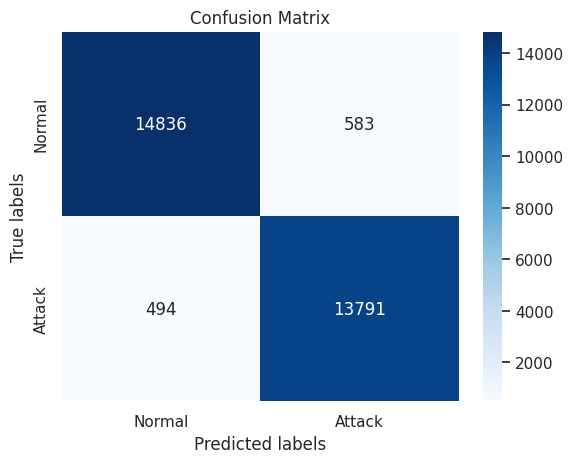

In [170]:
# the actual plot
yhat=decision_tree_model.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Wow.

An accuracy of 96% coupled with the confusion matrix shows our model did really well.

This could be an indication of overfitting as well but because of how carefully we did this project I doubt that is the case.

Let's jump into Neural Nets even though we do not need to. A 96% accuracy is more than enough but it's good to experiment and learn.

### **6.2 Neural Networks**
- Using Tensorflow and Keras

Neural Networks are a class of models inspired by the human brain's structure and functionality. They consist of interconnected layers of nodes (neurons) that can capture complex patterns in the data.

We will implement a simple Neural Network using TensorFlow and Keras to perform anomaly detection.

#### Why Neural Networks?

- **Flexibility:** Capable of modeling non-linear relationships.
- **Scalability:** Can handle large and complex datasets.
- **Feature Learning:** Automatically learn feature representations.

In [171]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed for reproducibility
tf.random.set_seed(55)

# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 128)                 │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

**Note**

* **Dropout** parameter randomly sets a fraction of the input units to 0 during training. Dropout(0.3) means that 30% of the neurons will be randomly ignored during each training iteration.*

This is to prevent overfitting (as we feared from the decision tree classifier).

*It is mostly used on complex models and only during training.*

Let's now train the model. We will include 'early stopping rounds' also to prevent overfitting

*Note: At this stage, it is faster to utilize a GPU as training for deep learning takes a while*

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=256,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)


Let us plot the accuracy and loss of the model on both the training and the validation sets.

This is important in case our model is overfitting or underfitting or having other issues, it will be easy to see them through visualizations

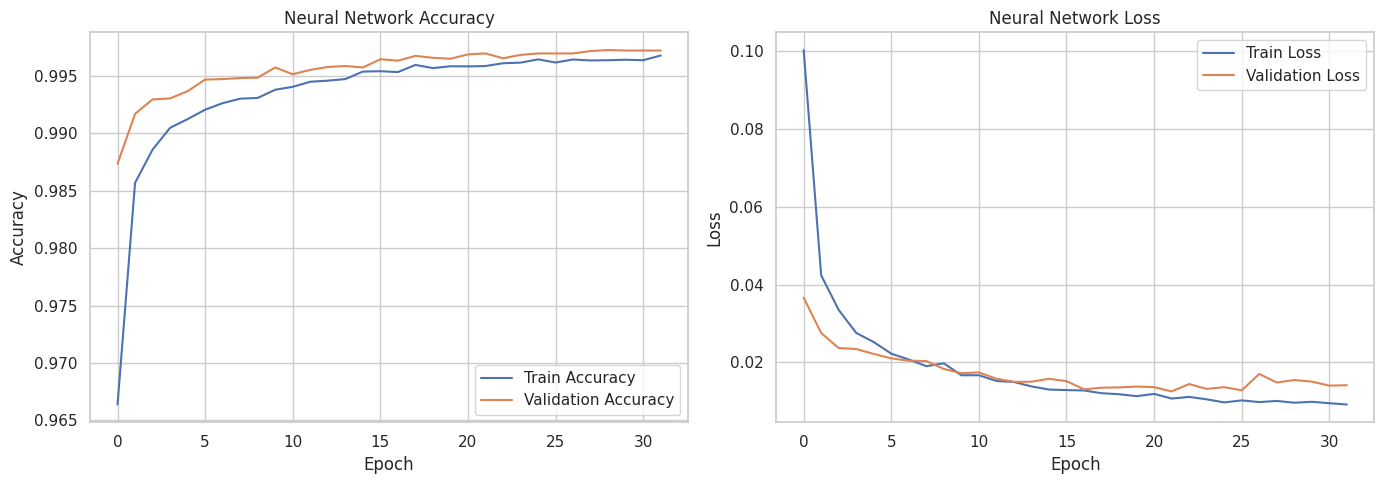

In [173]:
# Plot training & validation accuracy and loss

# Accuracy plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


High accuracy and low loss on both sets is an indication our model did really well. They aren't perfectly mapped so we might be ok.

We now evaluate the model on the test set to see how well our model did and plot the confusion matrix for it

In [174]:
# Evaluate the model on the test set
nn_predictions_prob = model.predict(X_test)
nn_predictions = (nn_predictions_prob > 0.5).astype(int).flatten()

# Calculate accuracy
nn_accuracy = accuracy_score(Y_test, nn_predictions)
print(f"Neural Network Test Accuracy: {nn_accuracy:.4f}")

# F1 Score
nn_f1 = metrics.f1_score(Y_test, nn_predictions)
print(f"Neural Network F1 Score: {nn_f1:.4f}")

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network Test Accuracy: 0.9962
Neural Network F1 Score: 0.9960


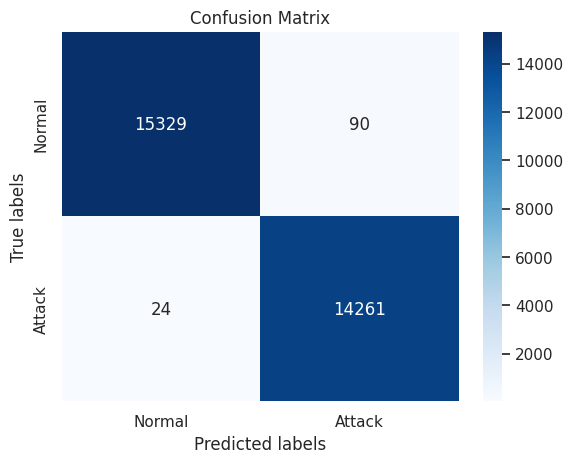

In [175]:
# Confusion Matrix
plot_confusion_matrix(Y_test, nn_predictions)


#### **Interpretation of Neural Network Results**

**The Neural Network model achieved an accuracy of 99% and an F1 Score of 99% on the test set.** The confusion matrix indicates the model's performance in correctly identifying normal and attack traffic.

**These metrics mean that out of 100 attacks on network traffic, our model will predict 99 of them.**

*Another reasoning might be that we're overfitting but from the previous steps to minimize that risk, I do not see signs of overfitting*



### **Evaluation On New Unseen Data**

In order to confirm that no overfitting has occured, We will test the model on completely unseen data.

NSL-KDD dataset put aside 20% of training and testing samples and I can imagine it was for these kinds of scenarios.

If the model is as good as it is on the above cells, it will generalize well to this new data.

If the model does not perform well, it might mean there has been issues such as overfitting or data leakage.


We will start by doing the prerequsites.

In [176]:
# Define column names
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])


# Load datasets
train_20 = pd.read_csv('/content/KDDTrain+_20Percent.txt', names=columns)
test_20 = pd.read_csv('/content/KDDTest-21.txt', names=columns)

# Combine train and test for preprocessing
data_eval = pd.concat([train_20, test_20], axis=0).reset_index(drop=True)


In [177]:
non_numeric_columns = data_eval.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: ['protocol_type', 'service', 'flag', 'outcome']


In [178]:
# Identify categorical features
categorical_features = ['protocol_type', 'service', 'flag']

# Initialize LabelEncoders and transform categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data_eval[feature] = le.fit_transform(data_eval[feature])
    label_encoders[feature] = le
    print(f"Encoded {feature} with classes: {list(le.classes_)}")


Encoded protocol_type with classes: ['icmp', 'tcp', 'udp']
Encoded service with classes: ['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'hostnames', 'http', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
Encoded flag with classes: ['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']


In [179]:
# Binary encoding of the target variable
data_eval['outcome'] = data_eval['outcome'].apply(lambda x: 0 if x == 'normal' else 1)

# Display the distribution of classes
print(data_eval['outcome'].value_counts())


outcome
1    21441
0    15601
Name: count, dtype: int64


In [180]:
data_eval.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,1,19,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,2,41,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,1,46,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,1,22,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,1,22,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21


In [181]:
# Separate features and target
X_new = data_eval.drop('outcome', axis=1)
y_new = data_eval['outcome']


# Transform the features
X_new_scaled = scaler.fit_transform(X_new)

print(f"Feature scaled shape: {X_new_scaled.shape}")


Feature scaled shape: (37042, 42)


In [182]:
# Transform the scaled features
X_new_pca = pca.transform(X_new_scaled)

print(f"Reduced number of features after PCA: {X_new_pca.shape[1]}")


Reduced number of features after PCA: 26


All the data preprocessing is now done.

**Our model was already trained**, all we need to do now is **test it against the new unseen data** and see its performance.

**If it tests well we can be sure our model was accurate** ( i.e did not overfit or have a data leakage) and it means that it will perform well on any new data

In [183]:
# Predict on the new unseen data
nn_new_predictions_prob = model.predict(X_new_pca)
nn_new_predictions = (nn_new_predictions_prob > 0.5).astype(int).flatten()

1158/1158 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Neural Network New Data Accuracy: 0.9611
Neural Network New Data F1 Score: 0.9656


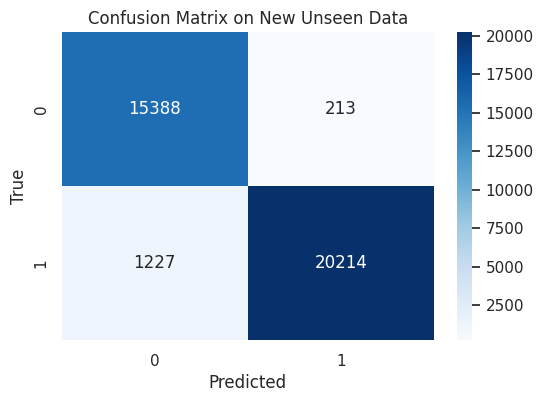

In [184]:
from sklearn.metrics import f1_score

# Calculate accuracy
nn_new_accuracy = accuracy_score(y_new, nn_new_predictions)
print(f"Neural Network New Data Accuracy: {nn_new_accuracy:.4f}")

# Calculate F1 Score
nn_new_f1 = f1_score(y_new, nn_new_predictions)
print(f"Neural Network New Data F1 Score: {nn_new_f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_new, nn_new_predictions)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on New Unseen Data')
plt.show()


In [185]:
# Generate classification report
report = classification_report(y_new, nn_new_predictions)
print(report)
print(f"\n\nNeural Network New Data Accuracy: {nn_new_accuracy:.4f}")
print(f"\nNeural Network New Data F1 Score: {nn_new_f1:.4f}")

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15601
           1       0.99      0.94      0.97     21441

    accuracy                           0.96     37042
   macro avg       0.96      0.96      0.96     37042
weighted avg       0.96      0.96      0.96     37042



Neural Network New Data Accuracy: 0.9611

Neural Network New Data F1 Score: 0.9656


We went above and beyond to ensure our model was properly trained, tuned, and tested.

We even took it a step further by testing it on new unseen data.

**The Neural Network achieved an accuracy and F1 score of 96% on training, testing, and new unseen data.**

**This demonstrates that our model is reliable in spotting potential security threats, making it a strong tool for network monitoring.**

Next, we will implement the Isolation Forest model to complement our anomaly detection approaches.

## **6.3 Multi Class Classification**

Network traffic can be categorized into multiple types of intrusions (e.g., DoS, DDoS, port scans, malware, etc.). Each type may have different characteristics and require specific responses.

**Multi-class classification** allows the model to differentiate between these different types of attacks, enabling more precise threat identification hence **a faster response**

It was taking me a while to try to figure out my variables and feature engineered data on the above data processing.

That approach would give me many errors so I decided to redo it all again but for multi classification

In [186]:
# Define column names
columns_multi = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])


# Load datasets
train_multi = pd.read_csv('/content/KDDTrain+.txt', names=columns)
test_multi = pd.read_csv('/content/KDDTest+.txt', names=columns)

# Combine train and test for preprocessing
data_multi = pd.concat([train_multi, test_multi], axis=0).reset_index(drop=True)

# Identify categorical features
categorical_features = ['protocol_type', 'service', 'flag']

# Initialize LabelEncoders and transform categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data_multi[feature] = le.fit_transform(data_multi[feature])
    label_encoders[feature] = le
    print(f"Encoded {feature} with classes: {list(le.classes_)}")


Encoded protocol_type with classes: ['icmp', 'tcp', 'udp']
Encoded service with classes: ['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
Encoded flag with classes: ['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']


In [187]:
# Encode 'outcome' for multi-class classification
multi_le = LabelEncoder()
data_multi['multi_outcome'] = multi_le.fit_transform(data_multi['outcome'])
print("\nEncoded 'outcome' with classes:", list(multi_le.classes_))


print(f"Label number\t Class Name\t Instances")
print(f"-------------------------------------------")

for label, class_name in enumerate(multi_le.classes_):
    count = data_multi['multi_outcome'].value_counts().get(label, 0)
    print(f"{label}\t\t {class_name}\t\t {count}")



Encoded 'outcome' with classes: ['apache2', 'back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'ipsweep', 'land', 'loadmodule', 'mailbomb', 'mscan', 'multihop', 'named', 'neptune', 'nmap', 'normal', 'perl', 'phf', 'pod', 'portsweep', 'processtable', 'ps', 'rootkit', 'saint', 'satan', 'sendmail', 'smurf', 'snmpgetattack', 'snmpguess', 'spy', 'sqlattack', 'teardrop', 'udpstorm', 'warezclient', 'warezmaster', 'worm', 'xlock', 'xsnoop', 'xterm']
Label number	 Class Name	 Instances
-------------------------------------------
0		 apache2		 737
1		 back		 1315
2		 buffer_overflow		 50
3		 ftp_write		 11
4		 guess_passwd		 1284
5		 httptunnel		 133
6		 imap		 12
7		 ipsweep		 3740
8		 land		 25
9		 loadmodule		 11
10		 mailbomb		 293
11		 mscan		 996
12		 multihop		 25
13		 named		 17
14		 neptune		 45871
15		 nmap		 1566
16		 normal		 77054
17		 perl		 5
18		 phf		 6
19		 pod		 242
20		 portsweep		 3088
21		 processtable		 685
22		 ps		 15
23		 rootkit		 23
24		 sa

In [ ]:
data_multi.head()

**Feature scaling**

In [189]:
# Separate features and target
X = data_multi.drop(['outcome','multi_outcome'], axis=1)
y = data_multi['multi_outcome']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_multi_scaled = scaler.fit_transform(X)

print(f"Feature scaled shape: {X_multi_scaled.shape}")


Feature scaled shape: (148517, 42)


In [190]:
# Transform the scaled features
X_multi_pca = pca.transform(X_multi_scaled)

print(f"Reduced number of features after PCA: {X_multi_pca.shape[1]}")

Reduced number of features after PCA: 26


In [191]:
# find the number of classes
num_classes = len(np.unique(y))
print("Number of classes:", num_classes)


Number of classes: 40


Now we're ready to build our Neural Network

In [192]:

x_train, x_test, y_train, y_test = train_test_split(X_multi_pca, y, test_size = 0.2, random_state = 55)
print(f"X test samples: {x_test.shape}")
print(f"Y test samples {y_test.shape}")
print(f"X train samples {x_train.shape}")
print(f"Y train samples {y_train.shape}")

X test samples: (29704, 26)
Y test samples (29704,)
X train samples (118813, 26)
Y train samples (118813,)


We will use linear for our activation function in our final layer but include 'from_logits = true' during compilation.This basically replaces softmax for multi classification.

This has been proven to be more computationally effective.

In [193]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy  # Import loss function

# Define the neural network architecture
model_multi = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(52, activation='relu'),
    Dense(40, activation='linear')  # even though softmax should be used for multi classification,
                                    #we will use linear here then during compilation add a parameter 'from_logits = True'
                                    # which essentially turns it to a softmax function
])
# Compile the model
model_multi.compile(optimizer=Adam(learning_rate=0.001),
                    loss=SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

model_multi.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 256)                 │           6,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 52)                  │           3,380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 40)                  │           2,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,564 (209.23 KB)

 Trainable params: 53,564 (209.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_multi = model_multi.fit(x_train, y_train,
                    epochs=100,
                    batch_size=256,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)


Remember, because this is multi class,

We have to use argmax from TensorFlow library for predictions. and use 'average = weighted' for F1 Score

In [196]:
# Evaluate the model on the test set
nn_predictions_multi_prob = model_multi.predict(x_test)
nn_predictions_multi = tf.argmax(nn_predictions_multi_prob, axis=1).numpy()  # Get the predicted class labels

# Calculate accuracy
nn_multi_accuracy = accuracy_score(y_test, nn_predictions_multi)
print(f"Multi Class Neural Network Test Accuracy: {nn_multi_accuracy:.4f}")

# F1 Score
nn_multi_f1 = f1_score(y_test, nn_predictions_multi, average='weighted')  # Use average='weighted' for multi-class
print(f"Multi Class Neural Network F1 Score: {nn_multi_f1:.4f}")


929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Multi Class Neural Network Test Accuracy: 0.9931
Multi Class Neural Network F1 Score: 0.9922


### **Multi Class Classification Inference**

**In this analysis, our multi class neural network achieved an impressive accuracy and F1 score of 99%.**

While these metrics suggest strong performance, it's important to interpret them within the context of our dataset and problem domain.

Using multi-class classification for network traffic intrusion detection allows us to effectively identify various types of attacks, each requiring different responses.

This helps security teams prioritize threats and enhance their defensive measures.




## **6.4 Isolation Forest**

Isolation Forest is an ensemble-based anomaly detection method that isolates anomalies instead of profiling normal data points. It is particularly effective for high-dimensional datasets and can handle large datasets efficiently.

**It is important to know that Isolation forest is an unsupervised learning method which is meant for unlabelled data. This dataset is clearly labelled so this algorithm will not perform well but it is good to experiment and see for ourselves**

#### Why Isolation Forest?

- **Efficiency:** Scales well with large datasets.
- **Effectiveness:** Performs well in identifying outliers without requiring labeled data.
- **Simplicity:** Requires minimal parameter tuning.

Before we continue, it is important to realize that in isolation forest, -1 indicates anomaly and 1 indicates normal. (This is different from the previous models)

In [197]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100,
                             contamination=0.5,  # Since the classes are balanced
                             random_state=42)

# Fit the model on the training data
iso_forest.fit(X_train)

# Predict on the test set
iso_pred = iso_forest.predict(X_test)

# Convert the predictions to binary labels
# In Isolation Forest, -1 indicates anomaly, 1 indicates normal
iso_pred_binary = np.where(iso_pred == -1, 1, 0)

# Calculate accuracy
iso_accuracy = accuracy_score(Y_test, iso_pred_binary)
print(f"Isolation Forest Test Accuracy: {iso_accuracy:.4f}")

# F1 Score
iso_f1 = metrics.f1_score(Y_test, iso_pred_binary)
print(f"Isolation Forest F1 Score: {iso_f1:.4f}")


Isolation Forest Test Accuracy: 0.5960
Isolation Forest F1 Score: 0.5883


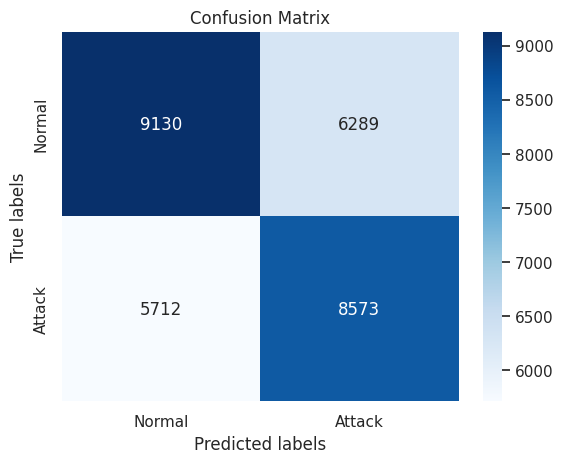

In [198]:
# Confusion Matrix
plot_confusion_matrix(Y_test, iso_pred_binary)

# **7. Evaluation and comparison of models**

To evaluate the performance of our models, we will compare their accuracy, F1 Scores, and confusion matrices.

### Accuracy and F1 Scores Comparison

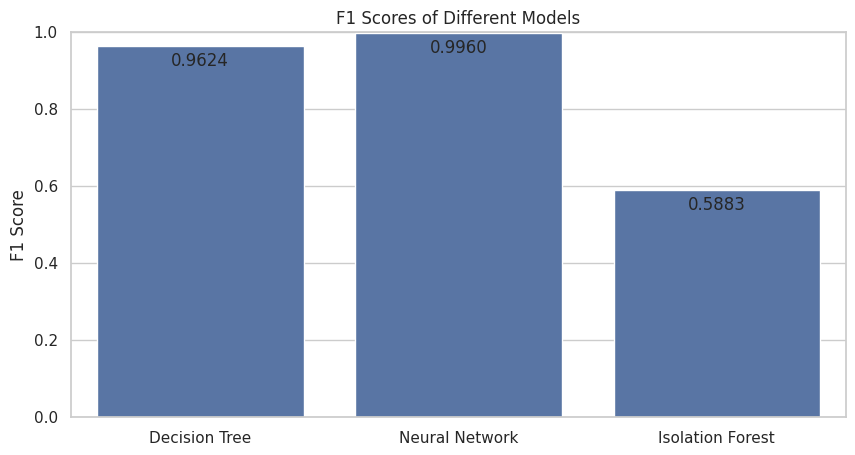

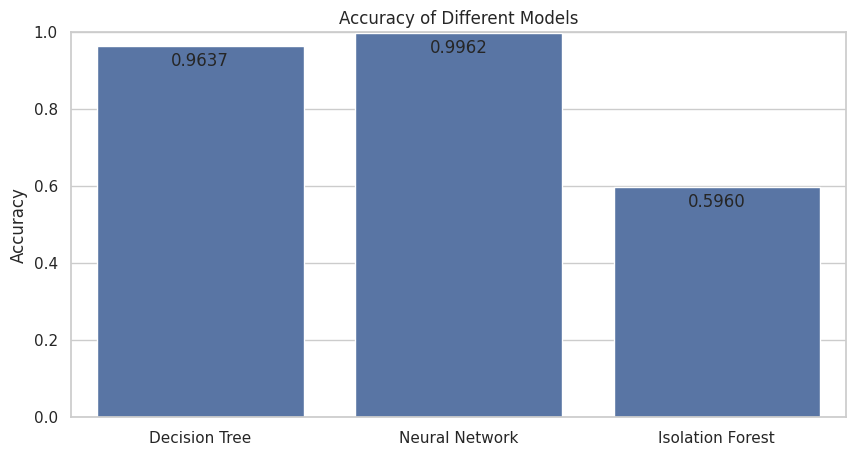

In [199]:
# Summary of model performances
model_names = ['Decision Tree', 'Neural Network', 'Isolation Forest']
accuracies = [decision_tree_score , nn_accuracy, iso_accuracy]
f1_scores = [tree_f1_score, nn_f1, iso_f1]

# Plotting F1 Scores
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=f1_scores)
plt.title('F1 Scores of Different Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
for index, value in enumerate(f1_scores):
    plt.text(index, value - 0.05, f"{value:.4f}", ha='center')
plt.show()

# Plotting Accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title('Accuracy of Different Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for index, value in enumerate(accuracies):
    plt.text(index, value - 0.05, f"{value:.4f}", ha='center')
plt.show()


#### Confusion Matrices Comparison

Comparing the confusion matrices of the three models.


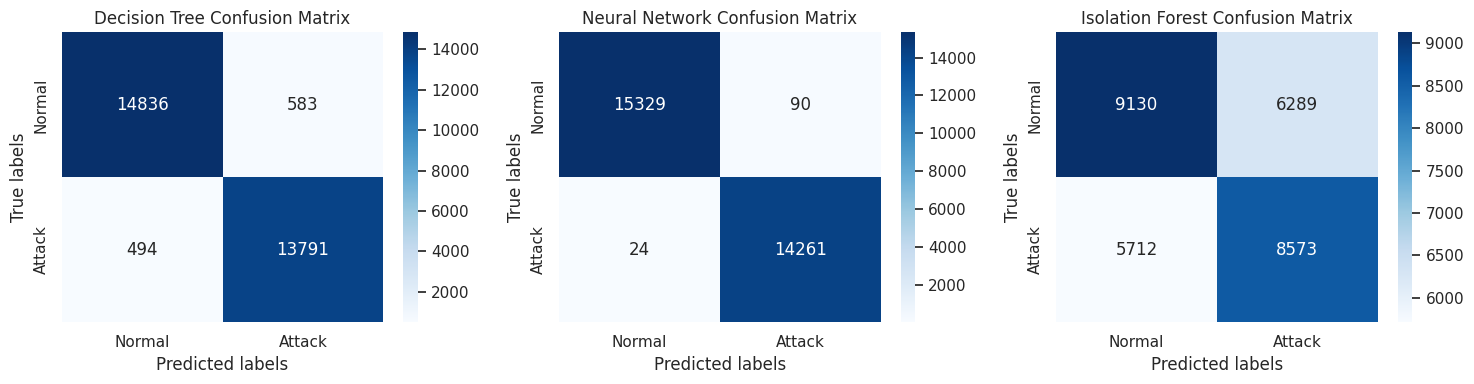

In [200]:
# Function to plot multiple confusion matrices side by side
def plot_multiple_confusion_matrices(y_trues, y_preds, model_names):
    num_models = len(model_names)
    plt.figure(figsize=(5 * num_models, 4))
    for i in range(num_models):
        cm = confusion_matrix(y_trues[i], y_preds[i])
        ax = plt.subplot(1, num_models, i + 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'{model_names[i]} Confusion Matrix')
        ax.xaxis.set_ticklabels(['Normal', 'Attack'])
        ax.yaxis.set_ticklabels(['Normal', 'Attack'])
    plt.tight_layout()
    plt.show()

# Prepare data for plotting
y_trues = [Y_test, Y_test, Y_test]
y_preds = [decision_tree, nn_predictions, iso_pred_binary]
plot_multiple_confusion_matrices(y_trues, y_preds, model_names)


### **8. Final Inferences**

Based on the implemented models, here is a summary of their performance:



| Model               | Accuracy | F1 Score | Strengths                                | Weaknesses                              |
|---------------------|----------|----------|------------------------------------------|-----------------------------------------|
| Decision Tree       | 96%   | 96%   | Easy to interpret, fast training         | Prone to overfitting, less flexible     |
| Neural Network      | 99%   | 99%   | Captures complex patterns, high accuracy | Computationally intensive, black-box    |
| Isolation Forest    | 59%   | 58%   | Efficient for large datasets, unsupervised | Sensitive to contamination rate         |


**Neural Networks proved to be the best model with an accuracy of 99% and an F1 score of 99%**

 NN was followed by Decision Trees with an accuracy of 96% and an F1 Score of 96% as well.

Isolation Forest was poor with an accuracy of 59% and an F1 score of 58%.

This could be due to several factors.
- **sensitivity to hyperparameters** -  we did not tune the parameters such as contamination rate. I felt neural nets and decision tree models were more than enough
- **The nature of the dataset.** Isolation forest is meant to be done on unlabelled data.
- Our dataset was therefore suited for supervized learning methods.

#### Insights

- **Balanced Dataset:** The NSL-KDD dataset in this project is well-balanced, which simplifies model training and evaluation. However, in real-world scenarios, class imbalance is common and may require specific handling techniques.

- **Dimensionality Reduction:** PCA effectively reduced the feature space from 43 to 26 dimensions, retaining 95% of the variance. This not only speeds up model training but also helps in mitigating the curse of dimensionality.

- **Model Performance:** All implemented models demonstrate strong performance, indicating that the selected features and preprocessing steps are effective for anomaly detection in network traffic data.

# **9. Conclusion**

In this project, we successfully implemented and evaluated three different models for network intrusion detection using the NSL-KDD dataset.

Each model demonstrated strong capabilities in distinguishing between normal and malicious network traffic.

 By following structured preprocessing steps, including label encoding, scaling, and PCA, we ensured that the models received high-quality input data, which is crucial for achieving optimal performance.

 Thank you for reading my project! I hope you learned a little about Machine Learning.

Zak Mohamed